In [1]:
%pylab
%matplotlib inline
import pandas as pd

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
train=pd.read_csv('diabetes.csv')

In [3]:
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


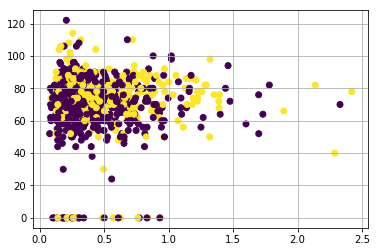

In [5]:
scatter(train.DiabetesPedigreeFunction,train.BloodPressure,c=train.Outcome)
grid()

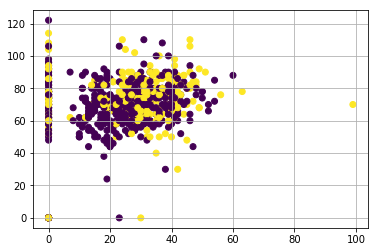

In [6]:
scatter(train.SkinThickness,train.BloodPressure,c=train.Outcome)
grid()

In [7]:
train.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
trained=train.drop(['Outcome'],axis=1)

In [9]:
trained.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [10]:
from sklearn.cluster import KMeans
cluster=KMeans(n_clusters=2)

In [11]:
trained['cluster']=cluster.fit_predict(trained)

In [12]:
trained.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,cluster
0,6,148,72,35,0,33.6,0.627,50,0
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,0
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


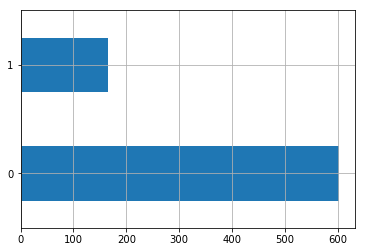

In [13]:
trained.cluster.value_counts().plot(kind='barh')
grid()

In [14]:
friend=trained.drop(['cluster'],axis=1)

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca=PCA(n_components=2)


In [17]:
trained['pca_x']=pca.fit_transform(friend)[:,0]
trained['pca_y']=pca.fit_transform(friend)[:,1]

In [18]:
trained.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,cluster,pca_x,pca_y
0,6,148,72,35,0,33.6,0.627,50,0,-75.714655,-35.950783
1,1,85,66,29,0,26.6,0.351,31,0,-82.358268,28.908213
2,8,183,64,0,0,23.3,0.672,32,0,-74.630643,-67.906496
3,1,89,66,23,94,28.1,0.167,21,0,11.077423,34.898486
4,0,137,40,35,168,43.1,2.288,33,1,89.743788,-2.746937


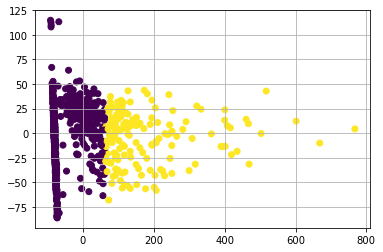

In [19]:
scatter(trained.pca_x,trained.pca_y,c=trained.cluster)
grid()

In [20]:
trained.groupby('cluster').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,pca_x,pca_y
cluster,,,,,,,,,,
0,3.883914,115.266998,68.097844,17.618574,32.212272,31.173632,0.437570,33.114428,-48.014426,0.997624
1,3.703030,141.460606,72.787879,31.200000,253.709091,34.985455,0.597248,33.703030,175.470904,-3.645862


In [21]:
train.BloodPressure.describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [24]:
#WHAT IF I SCALED?

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
sc=StandardScaler()

In [27]:
friend_sc=sc.fit_transform(friend)

In [30]:
friend_sc

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ..., 
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [32]:
truth=pd.DataFrame({'Pregnancies':friend_sc[:,0],'Glucose':friend_sc[:,1],'BloodPressure':friend_sc[:,2],
                   'SkinThickness':friend_sc[:,3],'Insulin':friend_sc[:,4],'BMI':friend_sc[:,5],
                   'DiabetesPedegreeFunction':friend_sc[:,6],'age':friend_sc[:,7],'Age':trained.Age})

In [33]:
truth.head()

,Age,BMI,BloodPressure,DiabetesPedegreeFunction,Glucose,Insulin,Pregnancies,SkinThickness,age
0,50,0.204013,0.149641,0.468492,0.848324,-0.692891,0.639947,0.907270,1.425995
1,31,-0.684422,-0.160546,-0.365061,-1.123396,-0.692891,-0.844885,0.530902,-0.190672
2,32,-1.103255,-0.263941,0.604397,1.943724,-0.692891,1.233880,-1.288212,-0.105584
3,21,-0.494043,-0.160546,-0.920763,-0.998208,0.123302,-0.844885,0.154533,-1.041549
4,33,1.409746,-1.504687,5.484909,0.504055,0.765836,-1.141852,0.907270,-0.020496


In [34]:
false=pd.DataFrame({'Pregnancies':friend_sc[:,0],'Glucose':friend_sc[:,1],'BloodPressure':friend_sc[:,2],
                   'SkinThickness':friend_sc[:,3],'Insulin':friend_sc[:,4],'BMI':friend_sc[:,5],
                   'DiabetesPedegreeFunction':friend_sc[:,6],'age':friend_sc[:,7]})

In [35]:
truth['cluster']=cluster.fit_predict(false)

In [36]:
truth.head()

,Age,BMI,BloodPressure,DiabetesPedegreeFunction,Glucose,Insulin,Pregnancies,SkinThickness,age,cluster
0,50,0.204013,0.149641,0.468492,0.848324,-0.692891,0.639947,0.907270,1.425995,0
1,31,-0.684422,-0.160546,-0.365061,-1.123396,-0.692891,-0.844885,0.530902,-0.190672,1
2,32,-1.103255,-0.263941,0.604397,1.943724,-0.692891,1.233880,-1.288212,-0.105584,0
3,21,-0.494043,-0.160546,-0.920763,-0.998208,0.123302,-0.844885,0.154533,-1.041549,1
4,33,1.409746,-1.504687,5.484909,0.504055,0.765836,-1.141852,0.907270,-0.020496,1


In [37]:
trend=truth.drop(['Age','cluster'],axis=1)

In [38]:
truth['pca_X']=pca.fit_transform(trend)[:,0]
truth['pca_Y']=pca.fit_transform(trend)[:,1]

In [39]:
truth.head()

,Age,BMI,BloodPressure,DiabetesPedegreeFunction,Glucose,Insulin,Pregnancies,SkinThickness,age,cluster,pca_X,pca_Y
0,50,0.204013,0.149641,0.468492,0.848324,-0.692891,0.639947,0.907270,1.425995,0,1.068503,1.234895
1,31,-0.684422,-0.160546,-0.365061,-1.123396,-0.692891,-0.844885,0.530902,-0.190672,1,-1.121683,-0.733852
2,32,-1.103255,-0.263941,0.604397,1.943724,-0.692891,1.233880,-1.288212,-0.105584,0,-0.396477,1.595876
3,21,-0.494043,-0.160546,-0.920763,-0.998208,0.123302,-0.844885,0.154533,-1.041549,1,-1.115781,-1.271241
4,33,1.409746,-1.504687,5.484909,0.504055,0.765836,-1.141852,0.907270,-0.020496,1,2.359334,-2.184819


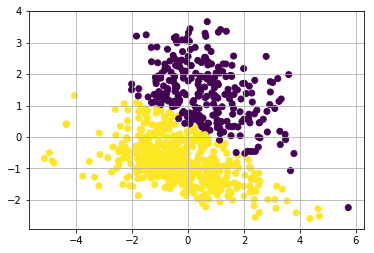

In [44]:
scatter(truth.pca_X,truth.pca_Y,c=truth.cluster)
grid()

In [74]:
shire=pd.concat([friend,truth[['Age','cluster']]],axis=1)

In [75]:
shire.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Age,cluster
0,6,148,72,35,0,33.6,0.627,50,50,0
1,1,85,66,29,0,26.6,0.351,31,31,1
2,8,183,64,0,0,23.3,0.672,32,32,0
3,1,89,66,23,94,28.1,0.167,21,21,1
4,0,137,40,35,168,43.1,2.288,33,33,1


In [64]:
truth.head()

,Age,BMI,BloodPressure,DiabetesPedegreeFunction,Glucose,Insulin,Pregnancies,SkinThickness,age,cluster,pca_X,pca_Y
0,50,0.204013,0.149641,0.468492,0.848324,-0.692891,0.639947,0.907270,1.425995,0,1.068503,1.234895
1,31,-0.684422,-0.160546,-0.365061,-1.123396,-0.692891,-0.844885,0.530902,-0.190672,1,-1.121683,-0.733852
2,32,-1.103255,-0.263941,0.604397,1.943724,-0.692891,1.233880,-1.288212,-0.105584,0,-0.396477,1.595876
3,21,-0.494043,-0.160546,-0.920763,-0.998208,0.123302,-0.844885,0.154533,-1.041549,1,-1.115781,-1.271241
4,33,1.409746,-1.504687,5.484909,0.504055,0.765836,-1.141852,0.907270,-0.020496,1,2.359334,-2.184819


In [76]:
friend.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [77]:
shire.groupby('cluster').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Age
cluster,,,,,,,,,
0,7.073529,134.750000,76.974265,18.257353,76.897059,32.926103,0.482338,45.577206,45.577206
1,2.074597,113.296371,64.790323,21.786290,81.391129,31.480645,0.466139,26.475806,26.475806


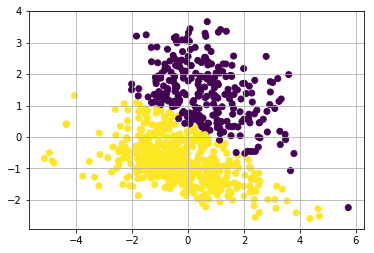

In [80]:
scatter(truth.pca_X,truth.pca_Y,c=truth.cluster)
grid()

In [81]:
0

0

In [82]:
0

0

In [83]:
0

0

In [84]:
0

0

In [85]:
0

0

In [86]:
#ANOTHER VIEW

In [87]:
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [93]:
traineee=train

In [94]:
traineee['pca_x']=pca.fit_transform(traineee[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])[:,0]

In [95]:
traineee['pca_y']=pca.fit_transform(traineee[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])[:,1]

In [96]:
traineee.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,pca_x,pca_y
0,6,148,72,35,0,33.6,0.627,50,1,-75.714655,-35.950783
1,1,85,66,29,0,26.6,0.351,31,0,-82.358268,28.908213
2,8,183,64,0,0,23.3,0.672,32,1,-74.630643,-67.906496
3,1,89,66,23,94,28.1,0.167,21,0,11.077423,34.898486
4,0,137,40,35,168,43.1,2.288,33,1,89.743788,-2.746937


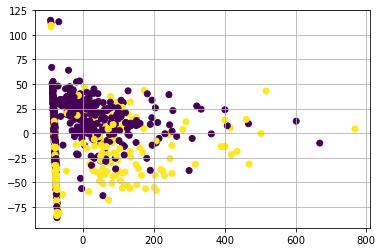

In [98]:
scatter(traineee.pca_x,traineee.pca_y,c=traineee.Outcome)
grid()